In [14]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('20100008.csv')
df = df[df["Adjustments"] == "Unadjusted"]

canada_df = df[df["GEO"] == "Canada"]

canada_df["Time Period"] = pd.to_datetime(canada_df["REF_DATE"])

canada_df

canada_df_few_cols = canada_df[["North American Industry Classification System (NAICS)", "Time Period", "VALUE"]]
canada_df_pivot = canada_df_few_cols.pivot(index="Time Period", columns="North American Industry Classification System (NAICS)", values="VALUE")

# All stores that do not have data at the start
canada_df_pivot_fewer_cols = canada_df_pivot.drop(columns=["Automobile dealers [4411]",
                            "Automotive parts, accessories and tire stores [4413]", 
                            "Cannabis stores [453993]", "Clothing stores [4481]", 
                            "Clothing stores [4481]", "Convenience stores [44512]", 
                            "Grocery stores [4451]", "Jewellery, luggage and leather goods stores [4483]", 
                            "Other motor vehicle dealers [4412]", "Shoe stores [4482]", 
                            "Specialty food stores [4452]", "Used car dealers [44112]"])

# All classifications that do not have data at the end
canada_df_pivot_fewer_cols = canada_df_pivot_fewer_cols.drop(columns=["Department stores [4521]", "Other general merchandise stores [4529]"])
canada_df_pivot_nona = canada_df_pivot_fewer_cols.dropna()

# calling it normalized because I don't know what else to call it
canada_df_pivot_nona_normalized = pd.DataFrame()
for (columnName, columnData) in canada_df_pivot_nona.iteritems():
    canada_df_pivot_nona_normalized[columnName] = canada_df_pivot_nona[columnName] / canada_df_pivot_nona["Retail trade [44-45]"]

canada_df_pivot_nona_normalized

<ipython-input-14-cf55b4de976d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_df["Time Period"] = pd.to_datetime(canada_df["REF_DATE"])


,"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
Time Period,,,,,,,,,,,,,,,,,
1991-01-01,0.038217,0.027687,0.056795,0.025565,0.313428,0.030178,0.020542,0.117594,0.104538,0.079311,0.009636,0.020004,0.197328,0.165683,1.0,0.027573,0.240820
1991-02-01,0.041812,0.028463,0.056419,0.026321,0.305578,0.033718,0.022510,0.106241,0.105359,0.080591,0.011208,0.022765,0.208701,0.173527,1.0,0.025846,0.229215
1991-03-01,0.043420,0.031701,0.063819,0.027589,0.300628,0.034046,0.022768,0.093753,0.112365,0.072614,0.011278,0.021781,0.216933,0.181602,1.0,0.024772,0.223390
1991-04-01,0.038348,0.035875,0.065407,0.024320,0.267259,0.035316,0.023925,0.089142,0.116889,0.067899,0.011391,0.021890,0.251294,0.205569,1.0,0.024709,0.198346
1991-05-01,0.042536,0.048158,0.064482,0.021190,0.271951,0.032530,0.021737,0.087404,0.119802,0.064677,0.010793,0.023442,0.242444,0.198064,1.0,0.023921,0.198197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,0.047272,0.086789,0.020277,0.020794,0.266756,0.020868,0.013964,0.076791,0.150980,0.079883,0.006903,0.029946,0.231975,0.167420,1.0,0.014941,0.186246
2020-06-01,0.042385,0.087650,0.039392,0.020103,0.218455,0.028736,0.019747,0.079252,0.127661,0.074001,0.008988,0.029179,0.274944,0.207127,1.0,0.020628,0.148755
2020-07-01,0.046112,0.074559,0.043371,0.021200,0.223780,0.030756,0.020604,0.086526,0.120974,0.073974,0.010153,0.030582,0.274671,0.207712,1.0,0.019607,0.149843


In [1]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('20100008.csv')
df = df[df["Adjustments"] == "Unadjusted"]

canada_df = df[df["GEO"] == "Canada"]

canada_df["Time Period"] = pd.to_datetime(canada_df["REF_DATE"])

canada_df_few_cols = canada_df[["North American Industry Classification System (NAICS)", "Time Period", "VALUE"]]
canada_df_pivot = canada_df_few_cols.pivot(index=canada_df_few_cols["Time Period"], columns='North American Industry Classification System (NAICS)')['VALUE']

# All stores that do not have data at the start
canada_df_pivot_fewer_cols = canada_df_pivot.drop(columns=["Automobile dealers [4411]",
                            "Automotive parts, accessories and tire stores [4413]", 
                            "Cannabis stores [453993]", "Clothing stores [4481]", 
                            "Clothing stores [4481]", "Convenience stores [44512]", 
                            "Grocery stores [4451]", "Jewellery, luggage and leather goods stores [4483]", 
                            "Other motor vehicle dealers [4412]", "Shoe stores [4482]", 
                            "Specialty food stores [4452]", "Used car dealers [44112]"])

# All classifications that do not have data at the end
canada_df_pivot_fewer_cols = canada_df_pivot_fewer_cols.drop(columns=["Department stores [4521]", "Other general merchandise stores [4529]"])
canada_df_pivot_nona = canada_df_pivot_fewer_cols.dropna()

# calling it normalized because I don't know what else to call it
canada_df_pivot_nona_normalized = pd.DataFrame()
for (columnName, columnData) in canada_df_pivot_nona.iteritems():
    canada_df_pivot_nona_normalized[columnName] = canada_df_pivot_nona[columnName] / canada_df_pivot_nona["Retail trade [44-45]"]

canada_df_pivot_nona_normalized

<ipython-input-1-12f8f003baa1>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  canada_df["Time Period"] = pd.to_datetime(canada_df["REF_DATE"])


,"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
Time Period,,,,,,,,,,,,,,,,,
1991-01-01,0.038217,0.027687,0.056795,0.025565,0.313428,0.030178,0.020542,0.117594,0.104538,0.079311,0.009636,0.020004,0.197328,0.165683,1.0,0.027573,0.240820
1991-02-01,0.041812,0.028463,0.056419,0.026321,0.305578,0.033718,0.022510,0.106241,0.105359,0.080591,0.011208,0.022765,0.208701,0.173527,1.0,0.025846,0.229215
1991-03-01,0.043420,0.031701,0.063819,0.027589,0.300628,0.034046,0.022768,0.093753,0.112365,0.072614,0.011278,0.021781,0.216933,0.181602,1.0,0.024772,0.223390
1991-04-01,0.038348,0.035875,0.065407,0.024320,0.267259,0.035316,0.023925,0.089142,0.116889,0.067899,0.011391,0.021890,0.251294,0.205569,1.0,0.024709,0.198346
1991-05-01,0.042536,0.048158,0.064482,0.021190,0.271951,0.032530,0.021737,0.087404,0.119802,0.064677,0.010793,0.023442,0.242444,0.198064,1.0,0.023921,0.198197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-01,0.047272,0.086789,0.020277,0.020794,0.266756,0.020868,0.013964,0.076791,0.150980,0.079883,0.006903,0.029946,0.231975,0.167420,1.0,0.014941,0.186246
2020-06-01,0.042385,0.087650,0.039392,0.020103,0.218455,0.028736,0.019747,0.079252,0.127661,0.074001,0.008988,0.029179,0.274944,0.207127,1.0,0.020628,0.148755
2020-07-01,0.046112,0.074559,0.043371,0.021200,0.223780,0.030756,0.020604,0.086526,0.120974,0.073974,0.010153,0.030582,0.274671,0.207712,1.0,0.019607,0.149843


In [2]:
canada_df_old_index = canada_df_pivot_nona_normalized.reset_index()

canada_df_old_index

,Time Period,"Beer, wine and liquor stores [4453]",Building material and garden equipment and supplies dealers [444],Clothing and clothing accessories stores [448],Electronics and appliance stores [443],Food and beverage stores [445],Furniture and home furnishings stores [442],Furniture stores [4421],Gasoline stations [447],General merchandise stores [452],Health and personal care stores [446],Home furnishings stores [4422],Miscellaneous store retailers [453],Motor vehicle and parts dealers [441],New car dealers [44111],Retail trade [44-45],"Sporting goods, hobby, book and music stores [451]",Supermarkets and other grocery (except convenience) stores [44511]
0,1991-01-01,0.038217,0.027687,0.056795,0.025565,0.313428,0.030178,0.020542,0.117594,0.104538,0.079311,0.009636,0.020004,0.197328,0.165683,1.0,0.027573,0.240820
1,1991-02-01,0.041812,0.028463,0.056419,0.026321,0.305578,0.033718,0.022510,0.106241,0.105359,0.080591,0.011208,0.022765,0.208701,0.173527,1.0,0.025846,0.229215
2,1991-03-01,0.043420,0.031701,0.063819,0.027589,0.300628,0.034046,0.022768,0.093753,0.112365,0.072614,0.011278,0.021781,0.216933,0.181602,1.0,0.024772,0.223390
3,1991-04-01,0.038348,0.035875,0.065407,0.024320,0.267259,0.035316,0.023925,0.089142,0.116889,0.067899,0.011391,0.021890,0.251294,0.205569,1.0,0.024709,0.198346
4,1991-05-01,0.042536,0.048158,0.064482,0.021190,0.271951,0.032530,0.021737,0.087404,0.119802,0.064677,0.010793,0.023442,0.242444,0.198064,1.0,0.023921,0.198197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,2020-05-01,0.047272,0.086789,0.020277,0.020794,0.266756,0.020868,0.013964,0.076791,0.150980,0.079883,0.006903,0.029946,0.231975,0.167420,1.0,0.014941,0.186246
353,2020-06-01,0.042385,0.087650,0.039392,0.020103,0.218455,0.028736,0.019747,0.079252,0.127661,0.074001,0.008988,0.029179,0.274944,0.207127,1.0,0.020628,0.148755
354,2020-07-01,0.046112,0.074559,0.043371,0.021200,0.223780,0.030756,0.020604,0.086526,0.120974,0.073974,0.010153,0.030582,0.274671,0.207712,1.0,0.019607,0.149843
355,2020-08-01,0.043404,0.073449,0.048246,0.023676,0.219567,0.031268,0.020571,0.088527,0.117606,0.072323,0.010698,0.033253,0.271204,0.214407,1.0,0.020880,0.149491


In [5]:
jan_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 1]
feb_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 2]
march_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 3]
apr_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 4]
may_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 5]
june_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 6]
july_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 7]
aug_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 8]
sept_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 9]
oct_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 10]
nov_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 11]
dec_data = canada_df_old_index[canada_df_old_index["Time Period"].dt.month == 12]

In [7]:
jan_data['Beer, wine and liquor stores [4453]'].describe()

count    30.000000
mean      0.035670
std       0.002154
min       0.032334
25%       0.033955
50%       0.035592
75%       0.036858
max       0.039901
Name: Beer, wine and liquor stores [4453], dtype: float64

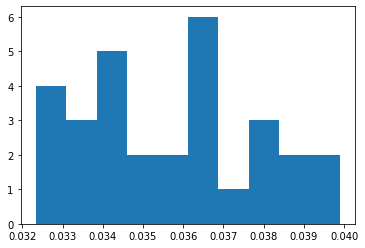

In [8]:
from matplotlib import pyplot
pyplot.hist(jan_data['Beer, wine and liquor stores [4453]'])
pyplot.show()

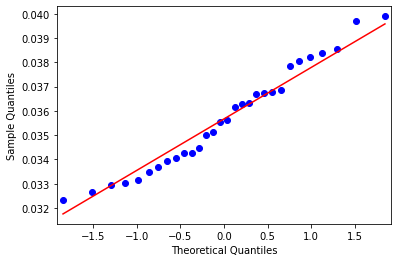

In [9]:
from statsmodels.graphics.gofplots import qqplot
qqplot(jan_data['Beer, wine and liquor stores [4453]'], line='s')
pyplot.show()

In [10]:
from scipy.stats import shapiro

stat, p = shapiro(jan_data['Beer, wine and liquor stores [4453]'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05

Statistics=0.959, p=0.289


In [12]:
from scipy.stats import anderson

# normality test
result = anderson(jan_data['Beer, wine and liquor stores [4453]'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.365
15.000: 0.521, data looks normal (fail to reject H0)
10.000: 0.593, data looks normal (fail to reject H0)
5.000: 0.712, data looks normal (fail to reject H0)
2.500: 0.830, data looks normal (fail to reject H0)
1.000: 0.988, data looks normal (fail to reject H0)


In [14]:
from scipy.stats import normaltest

# normality test
stat, p = normaltest(jan_data['Beer, wine and liquor stores [4453]'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2.534, p=0.282


In [17]:
# 
# Now do everyone we want to look at
# 
categories = ['Beer, wine and liquor stores [4453]', 'Building material and garden equipment and supplies dealers [444]', 
              'Clothing and clothing accessories stores [448]', 'Electronics and appliance stores [443]',
              'Furniture stores [4421]', 'Motor vehicle and parts dealers [441]']

for category in categories :
    for i in range(12):
        if i == 0 :
            print("Month: January" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(jan_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(jan_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(jan_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
        elif i == 1 :
            print("Month: Feburary" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(feb_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(feb_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(feb_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
        elif i == 2 :
            print("Month: March" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(march_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(march_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(march_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
        elif i == 3 :
            print("Month: April" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(apr_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(apr_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(apr_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
        elif i == 4 :
            print("Month: May" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(may_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(may_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(may_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
        elif i == 5 :
            print("Month: June" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(june_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(june_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(june_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
        elif i == 6 :
            print("Month: July" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(july_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(july_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(july_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
        elif i == 7 :
            print("Month: August" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(aug_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(aug_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(aug_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
        elif i == 8 :
            print("Month: September" + ", Category: " + category)
            print("sharpiro test")
            stat, p = shapiro(sept_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))
            
            print("Anderson")
            result = anderson(sept_data[category])
            print('Statistic: %.3f' % result.statistic)
            p = 0
            for i in range(len(result.critical_values)):
                sl, cv = result.significance_level[i], result.critical_values[i]
                if result.statistic < result.critical_values[i]:
                    print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
                else:
                    print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))
            
            print("normality test")
            
            stat, p = normaltest(sept_data[category])
            print('Statistics=%.3f, p=%.3f' % (stat, p))

Month: January, Category: Beer, wine and liquor stores [4453]
sharpiro test
Statistics=0.959, p=0.289
Anderson
Statistic: 0.365
15.000: 0.521, data looks normal (fail to reject H0)
10.000: 0.593, data looks normal (fail to reject H0)
5.000: 0.712, data looks normal (fail to reject H0)
2.500: 0.830, data looks normal (fail to reject H0)
1.000: 0.988, data looks normal (fail to reject H0)
normality test
Statistics=2.534, p=0.282
Month: Feburary, Category: Beer, wine and liquor stores [4453]
sharpiro test
Statistics=0.968, p=0.495
Anderson
Statistic: 0.312
15.000: 0.521, data looks normal (fail to reject H0)
10.000: 0.593, data looks normal (fail to reject H0)
5.000: 0.712, data looks normal (fail to reject H0)
2.500: 0.830, data looks normal (fail to reject H0)
1.000: 0.988, data looks normal (fail to reject H0)
normality test
Statistics=1.315, p=0.518
Month: March, Category: Beer, wine and liquor stores [4453]
sharpiro test
Statistics=0.924, p=0.034
Anderson
Statistic: 0.752
15.000: 0.5

Statistics=0.791, p=0.000
Anderson
Statistic: 1.197
15.000: 0.521, data does not look normal (reject H0)
10.000: 0.593, data does not look normal (reject H0)
5.000: 0.712, data does not look normal (reject H0)
2.500: 0.830, data does not look normal (reject H0)
1.000: 0.988, data does not look normal (reject H0)
normality test
Statistics=31.074, p=0.000
Month: May, Category: Furniture stores [4421]
sharpiro test
Statistics=0.908, p=0.014
Anderson
Statistic: 0.704
15.000: 0.521, data does not look normal (reject H0)
10.000: 0.593, data does not look normal (reject H0)
5.000: 0.712, data looks normal (fail to reject H0)
2.500: 0.830, data looks normal (fail to reject H0)
1.000: 0.988, data looks normal (fail to reject H0)
normality test
Statistics=10.154, p=0.006
Month: June, Category: Furniture stores [4421]
sharpiro test
Statistics=0.931, p=0.051
Anderson
Statistic: 0.748
15.000: 0.521, data does not look normal (reject H0)
10.000: 0.593, data does not look normal (reject H0)
5.000: 0.

In [33]:
#
# Define my z-test
#
def z_test(data, category):
    current_year_data = data[data["Time Period"].dt.year == 2020]
    print(( current_year_data[category] - data[category].mean() ) / data[category].std())
    print("Mean: " + str(data[category].mean()) + " Current Year: " + str(current_year_data[category]))

In [34]:
print("January")
z_test(jan_data, 'Beer, wine and liquor stores [4453]')
print("Febuary")
z_test(feb_data, 'Beer, wine and liquor stores [4453]')
print("June")
z_test(june_data, 'Beer, wine and liquor stores [4453]')
print("August")
z_test(aug_data, 'Beer, wine and liquor stores [4453]')
print("September")
z_test(sept_data, 'Beer, wine and liquor stores [4453]')

January
348    0.504401
Name: Beer, wine and liquor stores [4453], dtype: float64
Mean: 0.03566974543619754 Current Year: 348    0.036756
Name: Beer, wine and liquor stores [4453], dtype: float64
Febuary
349    0.045574
Name: Beer, wine and liquor stores [4453], dtype: float64
Mean: 0.0380280645501585 Current Year: 349    0.03812
Name: Beer, wine and liquor stores [4453], dtype: float64
June
353    1.168725
Name: Beer, wine and liquor stores [4453], dtype: float64
Mean: 0.03969179814135748 Current Year: 353    0.042385
Name: Beer, wine and liquor stores [4453], dtype: float64
August
355    0.091204
Name: Beer, wine and liquor stores [4453], dtype: float64
Mean: 0.04316696005066816 Current Year: 355    0.043404
Name: Beer, wine and liquor stores [4453], dtype: float64
September
356    0.21478
Name: Beer, wine and liquor stores [4453], dtype: float64
Mean: 0.039115248227750685 Current Year: 356    0.039506
Name: Beer, wine and liquor stores [4453], dtype: float64


In [35]:
print("March")
z_test(march_data, 'Building material and garden equipment and supplies dealers [444]')
print("April")
z_test(apr_data, 'Building material and garden equipment and supplies dealers [444]')
print("May")
z_test(may_data, 'Building material and garden equipment and supplies dealers [444]')
print("June")
z_test(june_data, 'Building material and garden equipment and supplies dealers [444]')

March
350    1.908283
Name: Building material and garden equipment and supplies dealers [444], dtype: float64
Mean: 0.046697297019535754 Current Year: 350    0.06086
Name: Building material and garden equipment and supplies dealers [444], dtype: float64
April
351    2.353938
Name: Building material and garden equipment and supplies dealers [444], dtype: float64
Mean: 0.05439394424578761 Current Year: 351    0.077219
Name: Building material and garden equipment and supplies dealers [444], dtype: float64
May
352    2.005334
Name: Building material and garden equipment and supplies dealers [444], dtype: float64
Mean: 0.06728898247813021 Current Year: 352    0.086789
Name: Building material and garden equipment and supplies dealers [444], dtype: float64
June
353    2.180712
Name: Building material and garden equipment and supplies dealers [444], dtype: float64
Mean: 0.06612248032561437 Current Year: 353    0.08765
Name: Building material and garden equipment and supplies dealers [444], dty

In [36]:
print("July")
z_test(july_data, 'Clothing and clothing accessories stores [448]')

July
354   -2.198644
Name: Clothing and clothing accessories stores [448], dtype: float64
Mean: 0.05314991647324553 Current Year: 354    0.043371
Name: Clothing and clothing accessories stores [448], dtype: float64


In [37]:
print("January")
z_test(jan_data, 'Electronics and appliance stores [443]')
print("Febuary")
z_test(feb_data, 'Electronics and appliance stores [443]')
print("April")
z_test(apr_data, 'Electronics and appliance stores [443]')
print("June")
z_test(june_data, 'Electronics and appliance stores [443]')
print("July")
z_test(july_data, 'Electronics and appliance stores [443]')
print("August")
z_test(aug_data, 'Electronics and appliance stores [443]')
print("September")
z_test(sept_data, 'Electronics and appliance stores [443]')

January
348   -2.005856
Name: Electronics and appliance stores [443], dtype: float64
Mean: 0.03149701201143266 Current Year: 348    0.022391
Name: Electronics and appliance stores [443], dtype: float64
Febuary
349   -2.230831
Name: Electronics and appliance stores [443], dtype: float64
Mean: 0.029562627103720387 Current Year: 349    0.019971
Name: Electronics and appliance stores [443], dtype: float64
April
351   -0.620956
Name: Electronics and appliance stores [443], dtype: float64
Mean: 0.025834892581439728 Current Year: 351    0.02416
Name: Electronics and appliance stores [443], dtype: float64
June
353   -1.738105
Name: Electronics and appliance stores [443], dtype: float64
Mean: 0.02534043134837758 Current Year: 353    0.020103
Name: Electronics and appliance stores [443], dtype: float64
July
354   -1.395812
Name: Electronics and appliance stores [443], dtype: float64
Mean: 0.025831033621409726 Current Year: 354    0.0212
Name: Electronics and appliance stores [443], dtype: float6

In [38]:
print("January")
z_test(jan_data, 'Furniture stores [4421]')
print("Febuary")
z_test(feb_data, 'Furniture stores [4421]')

January
348   -1.323625
Name: Furniture stores [4421], dtype: float64
Mean: 0.022707061945393087 Current Year: 348    0.020041
Name: Furniture stores [4421], dtype: float64
Febuary
349   -0.957529
Name: Furniture stores [4421], dtype: float64
Mean: 0.021956806435726263 Current Year: 349    0.020155
Name: Furniture stores [4421], dtype: float64


In [39]:
print("January")
z_test(jan_data, 'Motor vehicle and parts dealers [441]')
print("March")
z_test(march_data, 'Motor vehicle and parts dealers [441]')
print("May")
z_test(may_data, 'Motor vehicle and parts dealers [441]')
print("August")
z_test(aug_data, 'Motor vehicle and parts dealers [441]')

January
348    1.299923
Name: Motor vehicle and parts dealers [441], dtype: float64
Mean: 0.22126382880500317 Current Year: 348    0.250945
Name: Motor vehicle and parts dealers [441], dtype: float64
March
350   -2.035799
Name: Motor vehicle and parts dealers [441], dtype: float64
Mean: 0.25976145217421526 Current Year: 350    0.21384
Name: Motor vehicle and parts dealers [441], dtype: float64
May
352   -1.555726
Name: Motor vehicle and parts dealers [441], dtype: float64
Mean: 0.26790899973563953 Current Year: 352    0.231975
Name: Motor vehicle and parts dealers [441], dtype: float64
August
355    1.236307
Name: Motor vehicle and parts dealers [441], dtype: float64
Mean: 0.24381715530465545 Current Year: 355    0.271204
Name: Motor vehicle and parts dealers [441], dtype: float64
